In [1]:
import pandas as pd

In [2]:
smcs_full = pd.read_csv("../full_variants/caqtls.smc.benchmarking.all.tsv", sep="\t", header=0)


In [3]:
smcs_full.shape

(1984, 10)

In [4]:
smcs = smcs_full[smcs_full["var.isused"]]

(0.6981379220575643, 1.1026216279404355e-57)
(0.3794467644777755, 1.1503131753550222e-14)


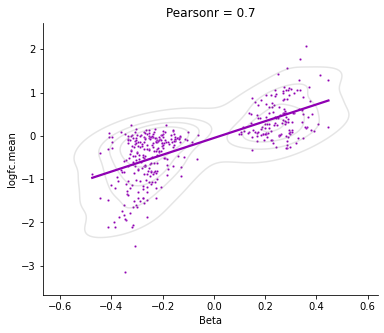

In [5]:
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np

data = pd.DataFrame()
data["logfc.mean"] = smcs["pred.chrombpnet.smc.varscore.logfc"]
data["Beta"] = smcs["obs.Effect_size"]-0.5

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=5, color="#8f00b3")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#8f00b3")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))

atc_pear = scipy.stats.pearsonr(abs(data["logfc.mean"]),abs(data["Beta"]))
print(atc_pear)
#ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))
plt.savefig("subfigs/smc_caqtls_scatter_plot.pdf", transparent=True, dpi=300)



In [6]:
import pandas as pd

df = pd.DataFrame()


values = []

atac_pear = scipy.stats.pearsonr(smcs["pred.chrombpnet.smc.varscore.logfc"],smcs["obs.Effect_size"])
values.append(atac_pear[0])
atac_pear = scipy.stats.pearsonr(smcs["pred.chrombpnet.smc.varscore.jsd"],smcs["obs.Effect_size"])
values.append(atac_pear[0])
atac_pear = scipy.stats.pearsonr(abs(smcs["pred.chrombpnet.smc.varscore.logfc"]),abs(smcs["obs.Effect_size"]-0.5))
values.append(atac_pear[0])
atac_pear = scipy.stats.pearsonr(abs(smcs["pred.chrombpnet.smc.varscore.jsd"]),abs(smcs["obs.Effect_size"]-0.5))
values.append(atac_pear[0])

df["pearsonr"] = values
df["method"] = ["logfc-signed", "jsd-signed",  "logfc-unsigned", "jsd-unsigned"]
df["dtype"] = ["ATAC"]*4

0    0.698138
1    0.684390
2    0.379447
3    0.374505
Name: pearsonr, dtype: float64


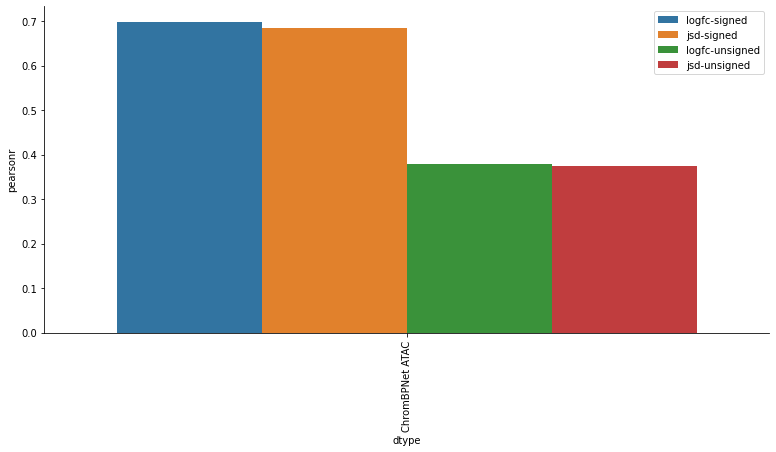

In [7]:
import seaborn as sns
import matplotlib
plt.figure(figsize=(13,6))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
print(df["pearsonr"])
ax = sns.barplot(data=df, x="dtype", y="pearsonr", hue="method")
xtix = ["ChromBPNet ATAC"]
ax.set_xticklabels(labels=xtix, rotation=90)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc="upper right")

plt.savefig("subfigs/smc_caqtls_compare.pdf", transparent=True, dpi=300)


In [ ]:
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np

data = pd.DataFrame()
data["logfc.mean"] = smcs_full["pred.chrombpnet.smc.varscore.logfc"]
data["Beta"] = smcs_full["obs.Effect_size"]-0.5

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=5, color="#8f00b3")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#8f00b3")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))

atc_pear = scipy.stats.pearsonr(abs(data["logfc.mean"]),abs(data["Beta"]))
print(atc_pear)
#ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))
